# Manuel Romero García
## Máster en Big Data y Data Science UCM
### Minería de datos

## Ejercicio 1. Con el conjunto de datos “FEV_data.csv” que se encuentra en la carpeta de datos de la documentación, y sabiendo que la variable objetivo es ‘fev’, se pide:

### 1- Reporte descriptivo de los datos. Dimensiones del dataset, número de variables continuas y categóricas. Distribuciones. Comentarios generales.

### 2- Decide si se descarta de inicio alguna de las variables de cara al modelado.

In [1]:
# cargamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import NuestrasFunciones as nf
import statsmodels.api as sm
from statsmodels.formula.api import ols

Información del dataset: https://rdrr.io/rforge/pimdevel/man/FEVData.html

In [2]:
# leemos y examinamos df
df = pd.read_csv("FEV_data.csv")
df.head()

,seqnbr,subjid,age,fev,height,sex,smoke
0,1,301,9,1.708,57.0,2,2
1,2,451,8,1.724,67.5,2,2
2,3,501,7,1.720,54.5,2,2
3,4,642,9,1.558,53.0,1,2
4,5,901,9,1.895,57.0,1,2


In [66]:
df.describe()

,seqnbr,subjid,age,fev,height,sex,smoke
count,654.00000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,327.50000,37169.571865,9.931193,2.636780,61.143578,1.486239,1.900612
std,188.93782,23690.860350,2.953935,0.867059,5.703513,0.500193,0.299412
min,1.00000,201.000000,3.000000,0.791000,46.000000,1.000000,1.000000
25%,164.25000,15811.000000,8.000000,1.981000,57.000000,1.000000,2.000000
50%,327.50000,36071.000000,10.000000,2.547500,61.500000,1.000000,2.000000
75%,490.75000,53638.500000,12.000000,3.118500,65.500000,2.000000,2.000000
max,654.00000,90001.000000,19.000000,5.793000,74.000000,2.000000,2.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


In [68]:
df.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

Primeros comentarios:
1. No existen nas en el raw, lo cual es positivo.
2. Como se observa en la documentación, debemos convertir sexo (1=chico, 2=chica) y si fuma (1=sí, 0=no) a categóricas.
3. seqnbr y subjid hacen referencia a un índice a un ID, lo que indica que tienen n valores y por lo tanto su valor explicativo es nulo, podemos eliminarlas.
4. El resto de variables no parecen presentar valores problemáticos, pero vamos a observar sus distribuciones para tener más información

In [69]:
# eliminamos columnas
df.drop(["seqnbr", "subjid"], axis=1, inplace=True)

# convertimos a categóricas

df["smoke"] = np.where(df["smoke"] == 1, "Sí", "No")
df["sex"] = np.where(df["sex"] == 1, "Chico", "Chica")


df.head()

,age,fev,height,sex,smoke
0,9,1.708,57.0,Chica,No
1,8,1.724,67.5,Chica,No
2,7,1.720,54.5,Chica,No
3,9,1.558,53.0,Chico,No
4,9,1.895,57.0,Chico,No


In [70]:
df.describe(exclude=np.number)

,sex,smoke
count,654,654
unique,2,2
top,Chico,No
freq,336,589


In [71]:
df.columns

Index(['age', 'fev', 'height', 'sex', 'smoke'], dtype='object')

In [72]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     654 non-null    int64   
 1   fev     654 non-null    float64 
 2   height  654 non-null    float64 
 3   sex     654 non-null    category
 4   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(1)
memory usage: 17.0 KB


Cont


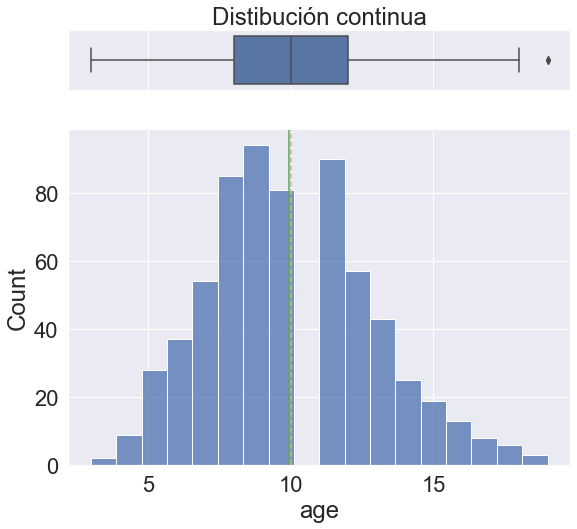

Cont


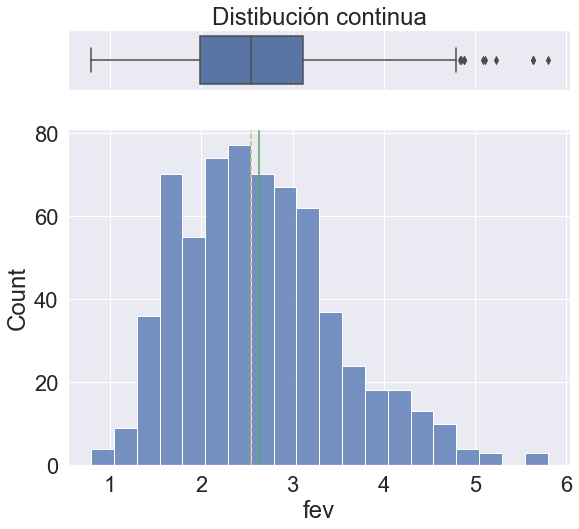

Cont


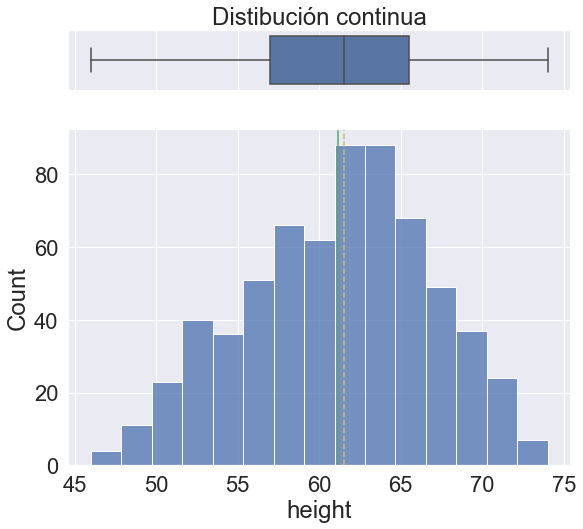

Cat
Cat


age       None
fev       None
height    None
sex       None
smoke     None
dtype: object

In [73]:
df.apply(nf.plot)

Comentarios:
1. Con respecto a las variables categóricas, el sexo parece bien balanceado, pero la variable de si fuma el sujeto no, lo cual es completamente normal, ya que esperamos que una minoría de las personas en este rango de edad fume.
2. Con respecto a las variables continuas, altura se comporta relativamente bien y fev está algo escorada a la izquierda, con algunos outilers, veremos si se trata de algún error o si no hay pruebas de ello y conviene convertirla el log o eliminar los outilers. Por otra parte, la variable edad es la más problemática, ya que hay datos perdidos a los 11 años y algunos outilers con más de 18. ¿Es posible de que se trate de un error de codificación?

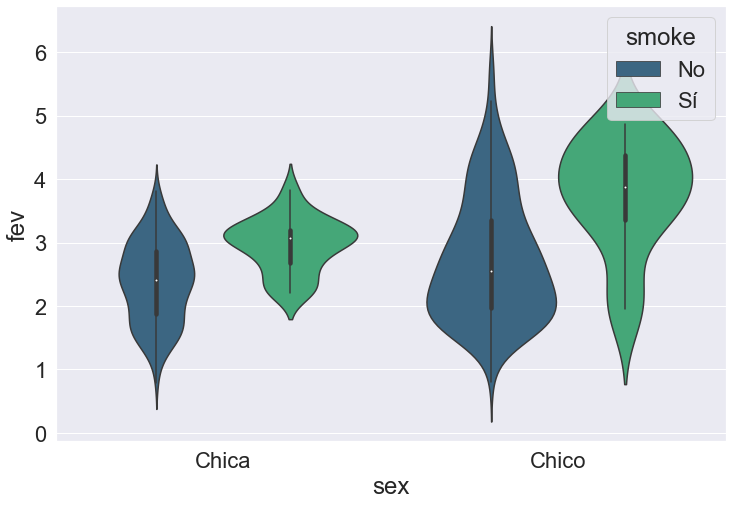

In [74]:
# observamos relaciones bivariantes con variables categóricas
plt.figure(figsize=(12, 8))
sns.violinplot(x='sex',y='fev',data=df,palette='viridis', hue='smoke');

In [21]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comentarios:
1. Es extraño pero parece que la asociación entre fumar y fev es, o bien nula, o bien ligeramente positiva, vamos a comprobarlo con un t test. Igualmente es posible que dependa de otros factores como la edad
2. Los outliers de fev no parecen presentar relaciones extrañas en los gráficos de violín o en los de dispersión en el report de pandas, por lo cual procederemos a añadirlos a la cola de la distribución, lo cual no causará muchos problemas
3. Parece que podemos tener problemas de colinealidad entre edad y altura y edad y fumar en los modelos de regresión, veremos después cómo arreglar esto, considerando dos opciones: VIF y selección de variables

In [75]:
from scipy import stats
stats.ttest_ind(df.loc[df["smoke"] == "Sí"]["fev"], df.loc[df["smoke"] == "No"]["fev"], equal_var=False)

Ttest_indResult(statistic=7.149608129503808, pvalue=3.073812744876234e-10)

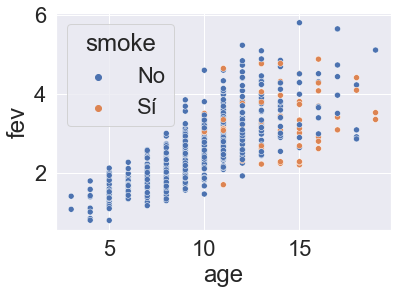

In [235]:
sns.scatterplot(data=df, x='age', y='fev', hue='smoke');

In [77]:
df.select_dtypes(include=np.number).copy().apply(lambda x: nf.gestiona_outliers(x, clas = 'check'))

age
fev
height


,age,fev,height
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0


Comentarios
1. No parece haber problemas con los pocos outliers que vimos en las visualizaciones, ya que ninguno es extremo según nuestro criterio: $\forall{x}, x_i \notin [Q1 - 3IQR, Q3 + 3IQR]$.
2. Parece que nuestras dudas con respecto a la variable fumar eran fruto de su interacción con edad

### 3- Ajusta el mejor modelo de regresión lineal sin interacciones entre las variables.

In [78]:
# generar variables aleatorias
df['aleatorio'] = np.random.uniform(0,1,size=df.shape[0])
df['aleatorio2'] = np.random.uniform(0,1,size=df.shape[0])
df.head()

,age,fev,height,sex,smoke,aleatorio,aleatorio2
0,9,1.708,57.0,Chica,No,0.356167,0.864295
1,8,1.724,67.5,Chica,No,0.490288,0.014424
2,7,1.720,54.5,Chica,No,0.623535,0.542689
3,9,1.558,53.0,Chico,No,0.036552,0.673404
4,9,1.895,57.0,Chico,No,0.821321,0.142844


In [79]:
# variable objetivo
dfy = df.fev
dfx = df.drop(['fev'],axis=1)

# importancia bivariante
tablaCramer = pd.DataFrame(dfx.apply(lambda x: nf.cramers_v(x,dfy)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a FEV').update_yaxes(categoryorder="total ascending")

In [80]:
transf_cramer = dfx.select_dtypes(include=np.number).apply(lambda x: nf.mejorTransf(x,dfy, tipo='cramer'))
transf_cramer_names = dfx.select_dtypes(include=np.number).apply(lambda x: nf.mejorTransf(x,dfy,tipo='cramer', name=True))
transf_cramer.columns = transf_cramer_names.values
dfx = transf_cramer.join(dfx.select_dtypes(exclude=np.number))
dfx.head()

,age_ident,height_sqr,aleatorio_sqr,aleatorio2_log,sex,smoke
0,2.032843,3.725719,1.555585,1.092350,Chica,No
1,1.694053,14.232450,2.956113,-3.032495,Chica,No
2,1.355262,2.224722,4.788909,0.626657,Chica,No
3,2.032843,1.508852,0.014932,0.842630,Chico,No
4,2.032843,3.725719,8.320679,-0.710496,Chico,No


In [81]:
tablaCramer = pd.DataFrame(dfx.apply(lambda x: nf.cramers_v(x,dfy)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a FEV').update_yaxes(categoryorder="total ascending")

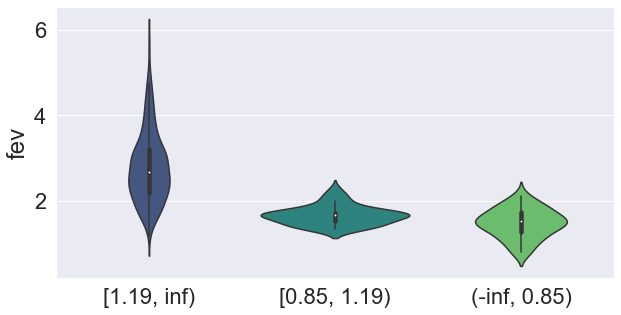

In [82]:
from optbinning import ContinuousOptimalBinning
def optb(x, y, bins):
    optb = ContinuousOptimalBinning(name="x", dtype="numerical", max_n_bins=bins)
    optb.fit(x, y)
    x_transform_bins = optb.transform(x, metric="bins")
    x_transform_bins
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=x_transform_bins,y=y,palette='viridis')

# he definido esta función en mi módulo de NuestrasFunciones, creía que era interesante
# nf.optb(dfx['age_ident'], dfy, 3)
optb(dfx['age_ident'], dfy, 3)

Comentarios
1. En principio, no parece que ninguna de las variables tenga menos peso que las aleatorias
2. La modificación de la altura apenas ha significado una importancia de la predicción
3. Hemos tratado de categorizar la edad para que sea menos problemático el missing en 11, pero los bins se realizan en tramos de edad mucho más bajos, por lo que no tiene mucho sentido convertirla en categórica
4. Ahora optaremos por seleccionar variables vía parsimonia y best

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(dfx, drop_first=True), dfy, test_size=0.2, random_state=3245)

# Comprobamos dimensiones
print('tamaño del train y test:', X_train.shape, y_train.shape)

tamaño del train y test: (523, 6) (523,)


In [140]:
dftrain  = X_train.join(y_train)

In [132]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

clf = LinearRegression()

sfs_forw = sfs(clf, 
          k_features='parsimonious', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=4)


sfs_forw = sfs_forw.fit(X_train, y_train)

print(sfs_forw.k_feature_names_)

('age_ident', 'height_sqr')


In [88]:
model1 = ols('fev ~ height_sqr + age_ident',data=dftrain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     943.4
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          9.66e-174
Time:                        20:24:29   Log-Likelihood:                -275.77
No. Observations:                 523   AIC:                             557.5
Df Residuals:                     520   BIC:                             570.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2385      0.047     26.383      0.000       1.146       1.331
height_sqr     0.1185      0.005     22.978      0.000       0.108       0.129
age_ident      0.1860      0.028      6.760      0.000       0.132       0.240
==============================================================================
Omnibus:                       24.080   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.686
Skew:                          -0.063   Prob(JB):                     3.31e-15
Kurtosis:                       4.745   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

clf = LinearRegression()

sfs_forw = sfs(clf, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=4)

#X_train = X_train.drop(["aleatorio_log", "aleatorio2_cuarta"], axis=1, inplace=True)

sfs_forw = sfs_forw.fit(X_train, y_train)


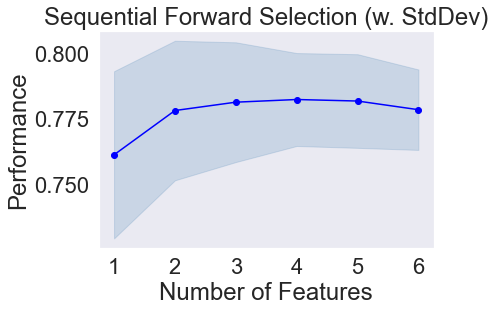

('age_ident', 'height_sqr', 'sex_Chico', 'smoke_Sí')


In [90]:
fig1 = plot_sfs(sfs_forw.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forw.k_feature_names_)

In [91]:
model2 = ols('fev ~ height_sqr + age_ident + sex_Chico + smoke_Sí',data=dftrain).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     492.2
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          7.08e-175
Time:                        20:24:30   Log-Likelihood:                -266.20
No. Observations:                 523   AIC:                             542.4
Df Residuals:                     518   BIC:                             563.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1429      0.051     22.241      0.000       1.042       1.244
height_sqr     0.1124      0.005     20.950      0.000       0.102       0.123
age_ident      0.2328      0.029      7.986      0.000       0.176       0.290
sex_Chico      0.1053      0.038      2.804      0.005       0.032       0.179
smoke_Sí      -0.2088      0.067     -3.125      0.002      -0.340      -0.078
==============================================================================
Omnibus:                       20.009   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.377
Skew:                          -0.035   Prob(JB):                     1.90e-11
Kurtosis:                       4.504   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfx_dum = pd.get_dummies(dfx, drop_first=True)

vif_data = pd.DataFrame()
vif_data["variable"] = dfx_dum.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dfx_dum.values, i)
                          for i in range(len(dfx_dum.columns))]

print("Nos encontramos de nuevo con el problema de la multicolinealidad\n")
  
print(vif_data)

Nos encontramos de nuevo con el problema de la multicolinealidad

         variable       VIF
0       age_ident  9.375985
1      height_sqr  8.281334
2   aleatorio_sqr  1.886144
3  aleatorio2_log  1.029250
4       sex_Chico  1.983599
5        smoke_Sí  1.294217


In [110]:
model3 = ols('fev ~ height_sqr',data=dftrain).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     1696.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          6.08e-166
Time:                        20:34:10   Log-Likelihood:                -297.80
No. Observations:                 523   AIC:                             599.6
Df Residuals:                     521   BIC:                             608.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4644      0.034     42.639      0.000       1.397       1.532
height_sqr     0.1448      0.004     41.178      0.000       0.138       0.152
==============================================================================
Omnibus:                       28.706   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.990
Skew:                          -0.051   Prob(JB):                     1.06e-20
Kurtosis:                       5.052   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model4 = ols('fev ~ age_ident',data=dftrain).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     675.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.03e-96
Time:                        20:34:10   Log-Likelihood:                -459.03
No. Observations:                 523   AIC:                             922.1
Df Residuals:                     521   BIC:                             930.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0734      0.066     16.315      0.000       0.944       1.203
age_ident      0.6639      0.026     25.991      0.000       0.614       0.714
==============================================================================
Omnibus:                       23.617   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.253
Skew:                           0.405   Prob(JB):                     1.63e-07
Kurtosis:                       3.882   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
model5 = ols('fev ~ height_sqr + sex_Chico + smoke_Sí',data=dftrain).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     566.5
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          3.05e-163
Time:                        20:34:10   Log-Likelihood:                -296.57
No. Observations:                 523   AIC:                             601.1
Df Residuals:                     519   BIC:                             618.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4471      0.037     39.630      0.000       1.375       1.519
height_sqr     0.1443      0.004     38.089      0.000       0.137       0.152
sex_Chico      0.0504      0.039      1.289      0.198      -0.026       0.127
smoke_Sí      -0.0456      0.067     -0.677      0.499      -0.178       0.087
==============================================================================
Omnibus:                       27.248   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.815
Skew:                          -0.047   Prob(JB):                     6.31e-19
Kurtosis:                       4.959   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model6 = ols('fev ~ age_ident + sex_Chico + smoke_Sí',data=dftrain).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     276.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          3.28e-107
Time:                        20:34:10   Log-Likelihood:                -426.69
No. Observations:                 523   AIC:                             861.4
Df Residuals:                     519   BIC:                             878.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8607      0.067     12.782      0.000       0.728       0.993
age_ident      0.6878      0.026     26.050      0.000       0.636       0.740
sex_Chico      0.3553      0.048      7.347      0.000       0.260       0.450
smoke_Sí      -0.2705      0.091     -2.985      0.003      -0.449      -0.092
==============================================================================
Omnibus:                       10.515   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.714
Skew:                           0.310   Prob(JB):                      0.00471
Kurtosis:                       3.326   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comentarios finales
1. Todas las variables del modelo son significativas
2. El principio de parsimonia nos dice que las variables más relevantes son la edad y la altura, el sexo y el hecho de fumar sólo incorporan un 0.8% más en explicación de la varianza. No obstante, como son datos que, en principio, pueden ser relevantes en otras circunstancias o para otros tramos de edad, cabe tenerlos en cuenta.
3. Al lidiar con la multicolinealidad, vemos que lo más razonable es quedarse con el modelo que incluye a la altura y no a la edad, ya que la primera explica más y afecta de manera similar al resto de variables.

### 4- Ajusta el mejor modelo de regresión lineal con interacciones entre las variables que resulten relevantes.

1. Primero creamos el dataset con interacciones
2. Hemos preferido optar por ser más "estrictos" y eliminar todas aquellas variables que tengan más de un 30% de valores iguales a cero
3. Después, optamos por ver cuál es el mejor modelo, ya que el más eficiente (por parsimonia) será, naturalmente, el mismo

In [120]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interaction

PolynomialFeatures(include_bias=False, interaction_only=True)

In [127]:
X_inter = pd.DataFrame(interaction.fit_transform(X_train), columns=interaction.get_feature_names_out(input_features=X_train.columns))
X_inter.head()

,age_ident,height_sqr,aleatorio_sqr,aleatorio2_log,sex_Chico,smoke_Sí,age_ident height_sqr,age_ident aleatorio_sqr,age_ident aleatorio2_log,age_ident sex_Chico,...,height_sqr aleatorio_sqr,height_sqr aleatorio2_log,height_sqr sex_Chico,height_sqr smoke_Sí,aleatorio_sqr aleatorio2_log,aleatorio_sqr sex_Chico,aleatorio_sqr smoke_Sí,aleatorio2_log sex_Chico,aleatorio2_log smoke_Sí,sex_Chico smoke_Sí
0,3.388006,14.902104,8.285703,-0.265971,1.0,0.0,50.488414,28.072009,-0.901112,3.388006,...,123.474407,-3.963530,14.902104,0.0,-2.203758,8.285703,0.0,-0.265971,-0.0,0.0
1,1.694053,6.034915,2.135965,1.116406,0.0,0.0,10.223465,3.618438,1.891251,0.000000,...,12.890367,6.737415,0.000000,0.0,2.384604,0.000000,0.0,0.000000,0.0,0.0
2,1.694053,4.072100,2.771370,-2.662860,0.0,0.0,6.898353,4.694848,-4.511025,0.000000,...,11.285297,-10.843431,0.000000,0.0,-7.379770,0.000000,0.0,-0.000000,-0.0,0.0
3,1.016472,2.494134,0.151745,0.649564,0.0,0.0,2.535216,0.154245,0.660263,0.000000,...,0.378473,1.620099,0.000000,0.0,0.098568,0.000000,0.0,0.000000,0.0,0.0
4,1.694053,6.034915,7.335495,-0.193470,0.0,0.0,10.223465,12.426716,-0.327748,0.000000,...,44.269088,-1.167574,0.000000,0.0,-1.419196,0.000000,0.0,-0.000000,-0.0,0.0


In [128]:
perc_greater_zero = X_inter.gt(0).mean()

X_inter = X_inter[perc_greater_zero[perc_greater_zero >= 0.3].index]

X_inter.head()

,age_ident,height_sqr,aleatorio_sqr,aleatorio2_log,sex_Chico,age_ident height_sqr,age_ident aleatorio_sqr,age_ident aleatorio2_log,age_ident sex_Chico,height_sqr aleatorio_sqr,height_sqr aleatorio2_log,height_sqr sex_Chico,aleatorio_sqr aleatorio2_log,aleatorio_sqr sex_Chico,aleatorio2_log sex_Chico
0,3.388006,14.902104,8.285703,-0.265971,1.0,50.488414,28.072009,-0.901112,3.388006,123.474407,-3.963530,14.902104,-2.203758,8.285703,-0.265971
1,1.694053,6.034915,2.135965,1.116406,0.0,10.223465,3.618438,1.891251,0.000000,12.890367,6.737415,0.000000,2.384604,0.000000,0.000000
2,1.694053,4.072100,2.771370,-2.662860,0.0,6.898353,4.694848,-4.511025,0.000000,11.285297,-10.843431,0.000000,-7.379770,0.000000,-0.000000
3,1.016472,2.494134,0.151745,0.649564,0.0,2.535216,0.154245,0.660263,0.000000,0.378473,1.620099,0.000000,0.098568,0.000000,0.000000
4,1.694053,6.034915,7.335495,-0.193470,0.0,10.223465,12.426716,-0.327748,0.000000,44.269088,-1.167574,0.000000,-1.419196,0.000000,-0.000000


In [144]:
sfs_forw = sfs(clf, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=4)


sfs_forw = sfs_forw.fit(X_inter, y_train)

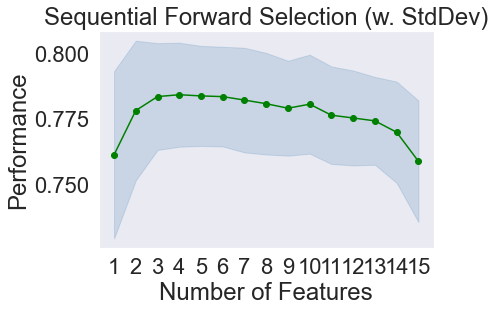

('age_ident', 'height_sqr', 'sex_Chico', 'age_ident sex_Chico')


In [143]:
fig1 = plot_sfs(sfs_forw.get_metric_dict(), kind='std_dev', color = 'green')

#plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forw.k_feature_names_)

In [163]:
model = ols('fev ~ height_sqr +  sex_Chico + age_ident:sex_Chico',data=dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     607.5
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          2.58e-169
Time:                        11:41:31   Log-Likelihood:                -282.47
No. Observations:                 523   AIC:                             572.9
Df Residuals:                     519   BIC:                             590.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5787      0.043     36.631      0.000       1.494       1.663
height_sqr              0.1243      0.005     24.804      0.000       0.114       0.134
sex_Chico              -0.3673      0.087     -4.241      0.000      -0.537      -0.197
age_ident:sex_Chico     0.1952      0.036      5.407      0.000       0.124       0.266
==============================================================================
Omnibus:                       17.552   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.415
Skew:                          -0.109   Prob(JB):                     7.51e-09
Kurtosis:                       4.292   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
stats.pearsonr(X_inter["height_sqr"], X_inter["age_ident sex_Chico"])

(0.5622149545623322, 6.450272575024028e-45)

Comentarios finales
1. Hemos tomado el mejor modelo con interacción y eliminado la variable edad, que presentaba problemas con la altura
2. Parece que el modelo es hasta ahora el más predictivo y no presenta problemas de multicolinealidad
3. Hemos elegido eliminar la variable edad a pesar de perder capacidad predictiva en el modelo con interacción.
4. No hemos considerado otras alternativas ya que la principal ventaja de los modelos de regresión frente a los de Machine Learning es la interpretabilidad de los coeficientes, lo cual sería difícil si incluimos una variable que sea, p. ej., el producto de la edad por la altura

### 5- Comparación de ambos modelos por validación cruzada repetida. ¿Cuál de ellos tiene mejor comportamiento en generalización?

In [212]:
form1 = 'fev ~ np.sqrt(height)'
form2 = 'fev ~ np.sqrt(height) + sex + smoke'
form3 = 'fev ~ np.sqrt(height) + sex + age:sex'
list_form = [form1, form2, form3]

Modelo: fev ~ np.sqrt(height)
Coeficiente de determinación R2: 0.741 (0.031)
Modelo: fev ~ np.sqrt(height) + sex + smoke
Coeficiente de determinación R2: 0.745 (0.031)
Modelo: fev ~ np.sqrt(height) + sex + age:sex
Coeficiente de determinación R2: 0.773 (0.024)


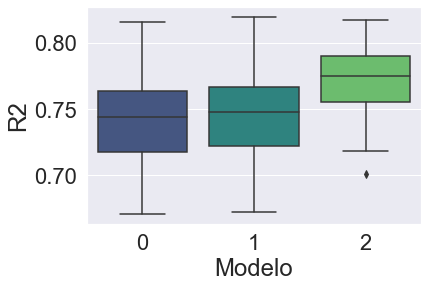

In [213]:
list_res = pd.DataFrame(map(lambda x: nf.cross_val_lin(x,df, seed=223),list_form))
results = list_res.T.melt()
results.columns = ['Modelo','R2']

sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis');

In [228]:
model = ols(form3,data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fev   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     575.6
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          9.07e-212
Time:                        12:54:03   Log-Likelihood:                -338.93
No. Observations:                 654   AIC:                             687.9
Df Residuals:                     649   BIC:                             710.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.5988      0.525    -18.297      0.000     -10.629      -8.569
sex[T.Chico]       -0.4427      0.113     -3.909      0.000      -0.665      -0.220
np.sqrt(height)     1.5033      0.075     20.153      0.000       1.357       1.650
age:sex[Chica]      0.0401      0.010      4.049      0.000       0.021       0.060
age:sex[Chico]      0.1029      0.011      9.104      0.000       0.081       0.125
==============================================================================
Omnibus:                       15.621   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.655
Skew:                           0.104   Prob(JB):                     5.99e-07
Kurtosis:                       4.004   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretación de resultados

Siendo pulgadas *P* y centímentros *C*, podemos decir que

$FEV = 1.5033\sqrt{P}$

$P \approx \frac{C}{2.54}$

$FEV = 1.5033\sqrt{\frac{C}{2.54}}$

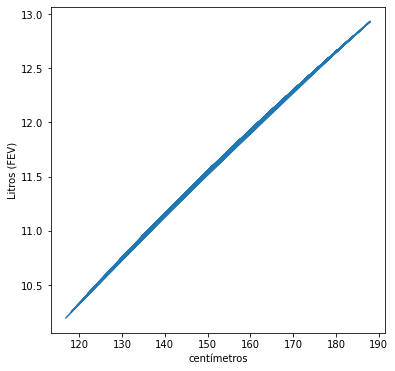

In [12]:
x = list(2.54*df['height'])
y = []
for i in x:
    j = 1.5033*np.sqrt(i/2.54)
    y.append(j)

plt.figure(figsize=(6, 6))
plt.ylabel("Litros (FEV)")
plt.xlabel("centímetros")
plt.plot(x, y);

1. Ser hombre parece que implica tener un volumen expiratorio forzado (aire expirado forzadamente después de un segundo de haber inhalado aire al máximo) menor en -0.44 litros de aire con respecto a las mujeres de la misma altura.
2. La altura parece ser un factor relevante, ya que el VEF aumenta conforme los sujetos son más altos, independientemente del sexo. Su relación no es exactamente lineal, pero puede verse reflejada en el gráfico de arriba.
3. Por cada año de edad, el VEF también aumenta, aunque de manera más acusada en los chicos que en las chicas (0.10 frente a 0.04 litros), independientemente de la altura.
4. En general, el modelo es bueno, ya que explica más del 78% de la varianza del VEF con pocas variables, además la cross validación nos garantiza que es robusto.
5. La variable fumar posiblemente no sea predictiva por la poca población que fuma en la muestra (y, posiblemente, también en la población), lo que puede sugerir que es conveniente realizar diferentes modelos de capacidad pulmonar para diferentes tramos de edad.

## Ejercicio 3. Con los datos de la serie de “defunciones.xlsx” que se encuentra en la carpeta de datos de la documentación, se pretende ajustar el mejor modelo de series temporales.

### 1-Lectura y representación de la serie. Descomposición. Conclusiones.

### 2- Partición training y test (los últimos 2 años de datos).

### 3- Mejor modelo de suavizado exponencial. ¿Pasa el test residual de Ljung.Box?

### 4- Mejor modelo ARIMA. ¿Pasa el test residual de Ljung.Box?

### 5- Comparación. En relación al RMSE en el conjunto de tets, ¿Qué modelo resulta más preciso en sus predicciones?